In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("USvideos_modified.csv", sep=",")
# shows top 10 rows
df.head(10)

,video_id,last_trending_date,publish_date,publish_hour,category_id,channel_title,views,likes,dislikes,comment_count,...,tag_appeared_in_title,title,tags,description,trend_day_count,trend.publish.diff,trend_tag_highest,trend_tag_total,tags_count,subscriber
0,2kyS6SvSYSE,2017-11-20,2017-11-13,17,22,CaseyNeistat,2564903,96321,7972,22149,...,False,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,7,7,2,2,1,9086142.0
1,1ZAPwfrtAFY,2017-11-20,2017-11-13,7,24,LastWeekTonight,6109402,151250,11508,19820,...,False,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",7,7,65,69,4,5937292.0
2,5qpjK5DgCt4,2017-11-20,2017-11-12,19,23,Rudy Mancuso,5315471,187303,7278,9990,...,True,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman|rudy|mancuso|king|bach|racist|...,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,7,8,68,426,23,4191209.0
3,puqaWrEC7tY,2017-11-20,2017-11-13,11,24,Good Mythical Morning,913268,16729,1386,2988,...,True,Nickelback Lyrics: Real or Fake?,rhett and link|gmm|good mythical morning|rhett...,Today we find out if Link is a Nickelback amat...,7,7,488,1246,28,13186408.0
4,d380meD0W0M,2017-11-19,2017-11-12,18,24,nigahiga,2819118,153395,2416,20573,...,True,I Dare You: GOING BALD!?,ryan|higa|higatv|nigahiga|i dare you|idy|rhpc|...,I know it's been a while since we did this sho...,6,7,488,1007,14,20563106.0
5,gHZ1Qz0KiKM,2017-11-20,2017-11-13,19,28,iJustine,1038365,22594,2798,3142,...,True,2 Weeks with iPhone X,ijustine|week with iPhone X|iphone x|apple|iph...,Thanks for watching! Don't forget to subscribe...,7,7,38,122,7,4652602.0
6,39idVpFF7NQ,2017-11-18,2017-11-12,5,24,Saturday Night Live,2688797,19042,3059,2689,...,True,Roy Moore & Jeff Sessions Cold Open - SNL,SNL|Saturday Night Live|SNL Season 43|Episode ...,Embattled Alabama Senate candidate Roy Moore (...,5,6,488,2216,42,5292034.0
7,nc99ccSXST0,2017-11-19,2017-11-12,21,28,CrazyRussianHacker,1251577,28951,1146,2606,...,True,5 Ice Cream Gadgets put to the Test,5 Ice Cream Gadgets|Ice Cream|Cream Sandwich M...,Ice Cream Pint Combination Lock - http://amzn....,6,7,113,180,13,10474796.0
8,jr9QtXwC9vc,2017-11-15,2017-11-13,14,1,20th Century Fox,2671756,12699,505,1010,...,True,The Greatest Showman | Official Trailer 2 [HD]...,Trailer|Hugh Jackman|Michelle Williams|Zac Efr...,"Inspired by the imagination of P.T. Barnum, Th...",2,2,151,458,28,2453494.0
9,TUmyygCMMGA,2017-11-15,2017-11-13,13,25,Vox,635985,20721,2417,4111,...,True,Why the rise of the robots won’t mean the end ...,vox.com|vox|explain|shift change|future of wor...,"For now, at least, we have better things to wo...",2,2,39,170,20,3808198.0


In [64]:
# every variable
list(df.columns)

['video_id',
 'last_trending_date',
 'publish_date',
 'publish_hour',
 'category_id',
 'channel_title',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'tag_appeared_in_title_count',
 'tag_appeared_in_title',
 'title',
 'tags',
 'description',
 'trend_day_count',
 'trend.publish.diff',
 'trend_tag_highest',
 'trend_tag_total',
 'tags_count',
 'subscriber']

In [65]:
# all the unqiue values of a certain col
for col in df:
    print(col)
    print(df[col].unique())


video_id
['2kyS6SvSYSE' '1ZAPwfrtAFY' '5qpjK5DgCt4' ... 'Juad74hE6rs' 'n_S8d_1KVhU'
 'Eouvsy8JdLU']
last_trending_date
['2017-11-20' '2017-11-19' '2017-11-18' '2017-11-15' '2017-11-14'
 '2017-11-16' '2017-11-17' '2017-11-22' '2017-11-21' '2017-11-23'
 '2017-11-24' '2017-11-25' '2017-11-26' '2017-11-28' '2017-11-27'
 '2017-11-29' '2017-11-30' '2017-12-01' '2017-12-02' '2017-12-03'
 '2017-12-06' '2017-12-05' '2017-12-04' '2017-12-07' '2017-12-08'
 '2017-12-09' '2017-12-10' '2017-12-11' '2017-12-12' '2017-12-14'
 '2017-12-13' '2017-12-15' '2017-12-17' '2017-12-16' '2017-12-19'
 '2017-12-18' '2017-12-20' '2017-12-21' '2017-12-22' '2017-12-24'
 '2017-12-25' '2017-12-23' '2017-12-28' '2017-12-27' '2017-12-29'
 '2017-12-26' '2018-01-01' '2017-12-30' '2018-01-02' '2017-12-31'
 '2018-01-03' '2018-01-04' '2018-01-05' '2018-01-06' '2018-01-07'
 '2018-01-08' '2018-01-09' '2018-01-12' '2018-01-14' '2018-01-15'
 '2018-01-13' '2018-01-18' '2018-01-17' '2018-01-16' '2018-01-19'
 '2018-01-22' '2018-01-

In [66]:
df.shape #matrix amount of rows and columns [uncleaned] 

(4547, 23)

In [67]:
df['channel_title'].nunique() # unique channels in this dataset?

1905

In [68]:
df.isna().sum() #no values

video_id                         0
last_trending_date               0
publish_date                     0
publish_hour                     0
category_id                      0
channel_title                    0
views                            0
likes                            0
dislikes                         0
comment_count                    0
comments_disabled                0
ratings_disabled                 0
tag_appeared_in_title_count      0
tag_appeared_in_title            0
title                            0
tags                           208
description                     89
trend_day_count                  0
trend.publish.diff               0
trend_tag_highest                0
trend_tag_total                  0
tags_count                       0
subscriber                      22
dtype: int64

In [69]:
#filling in descriptions that were blank
df.description= df.description.fillna('No description provided')
df.tags= df.tags.fillna(' ')

In [70]:
df.isna().sum() #double check no missing values

video_id                        0
last_trending_date              0
publish_date                    0
publish_hour                    0
category_id                     0
channel_title                   0
views                           0
likes                           0
dislikes                        0
comment_count                   0
comments_disabled               0
ratings_disabled                0
tag_appeared_in_title_count     0
tag_appeared_in_title           0
title                           0
tags                            0
description                     0
trend_day_count                 0
trend.publish.diff              0
trend_tag_highest               0
trend_tag_total                 0
tags_count                      0
subscriber                     22
dtype: int64

In [71]:
#no information provided for subscribers to we eliminate those rows
#as to not intefer with our final calculations
df = df.dropna() 

In [72]:
df.isna().sum().sum()
df.shape #change in shape

(4525, 23)

Text(0.5, 1.0, 'Regression plot for views and likes')

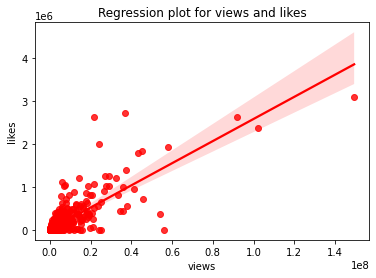

In [73]:
sns.regplot(data=df, x='views', y='likes', color='Red')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

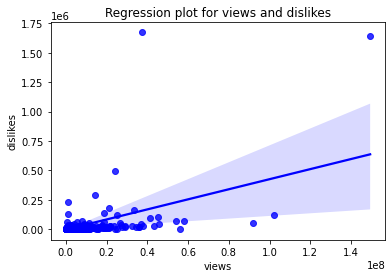

In [74]:
sns.regplot(data=df, x='views', y='dislikes', color= 'blue')
plt.title('Regression plot for views and dislikes')

In [75]:
df_corr = df[['likes', 'dislikes', 'comment_count', 'views']]
df_corr.corr()

,likes,dislikes,comment_count,views
likes,1.000000,0.460304,0.712906,0.820910
dislikes,0.460304,1.000000,0.833601,0.528963
comment_count,0.712906,0.833601,1.000000,0.573356
views,0.820910,0.528963,0.573356,1.000000


<AxesSubplot:>

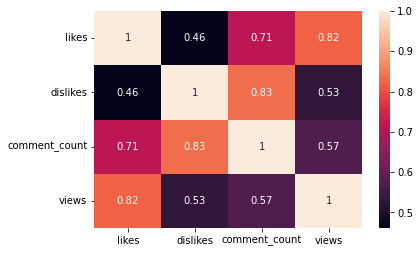

In [76]:
sns.heatmap(df_corr.corr(), annot= True)

In [77]:
df_cm = df_corr.corr().round(2)

#True Positive, True Negative, False Positive, False Negative Values for Confusion Matrix
likes_TP = df_cm.iloc[0]['likes']
likes_TN = (df_cm.sum().sum() - df_cm['likes'].sum() - df_cm.iloc[0].sum() + likes_TP).round(2)
likes_FP = df_cm['likes'].sum() - likes_TP
likes_FN = df_cm.iloc[0].sum() - likes_TP

dislikes_TP = df_cm.iloc[1]['dislikes']
dislikes_TN = (df_cm.sum().sum() - df_cm['dislikes'].sum() - df_cm.iloc[1].sum() + dislikes_TP).round(2)
dislikes_FP = df_cm['dislikes'].sum() - dislikes_TP
dislikes_FN = df_cm.iloc[1].sum() - dislikes_TP

comment_count_TP = df_cm.iloc[2]['comment_count']
comment_count_TN = (df_cm.sum().sum() - df_cm['comment_count'].sum() - df_cm.iloc[2].sum() + comment_count_TP).round(2)
comment_count_FP = df_cm['comment_count'].sum() - comment_count_TP
comment_count_FN = df_cm.iloc[2].sum() - comment_count_TP

views_TP = df_cm.iloc[3]['views']
views_TN = (df_cm.sum().sum() - df_cm['views'].sum() - df_cm.iloc[3].sum() + views_TP).round(2)
views_FP = df_cm['views'].sum() - views_TP
views_FN = df_cm.iloc[3].sum() - views_TP

In [78]:
#Data frame to display values for the purpose of checking math, will delete when evaluation metrics are decided and computed
cm_values = pd.DataFrame({'TP':[likes_TP,dislikes_TP,comment_count_TP, views_TP], 
                          'TN':[likes_TN,dislikes_TN,comment_count_TN, views_TN],
                          'FP':[likes_FP,dislikes_FP,comment_count_FP, views_FP],
                          'FN':[likes_FN,dislikes_FN,comment_count_FN, views_FN]})
cm_values.index = ['likes','dislikes','comment_count','views']
cm_values

,TP,TN,FP,FN
likes,1.0,6.86,1.99,1.99
dislikes,1.0,7.20,1.82,1.82
comment_count,1.0,6.62,2.11,2.11
views,1.0,7.00,1.92,1.92


# EXAMPLE SENTIMENT ANALYSIS

In [18]:
df.tags.head(10)
tags_complete=''.join(df.tags)

In [19]:
import re
tags= re.sub('[^a-zA-Z]', ' ', tags_complete)

In [20]:
# Display tags if u want a long list
#tags

In [21]:
tags= re.sub(' +', ' ', tags)

In [22]:
pip install wordcloud

     -------------------------------------- 155.9/155.9 KB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud, STOPWORDS
wordcloud= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(tags)

(-0.5, 1999.5, 999.5, -0.5)

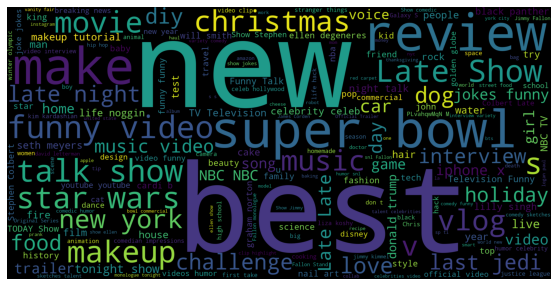

In [24]:
#Visualize
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')